In [2]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import random

In [3]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [4]:
fashion_train_df.shape

(60000, 785)

In [5]:
fashion_train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

training.shape



(60000, 785)

In [11]:
training    #should give an array

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

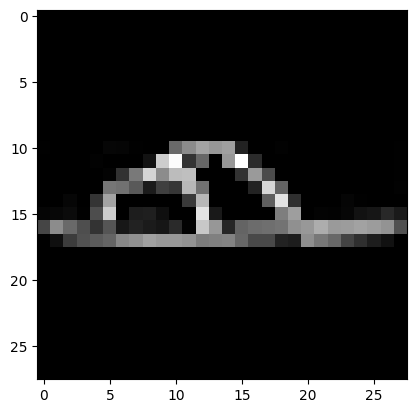

In [13]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
# plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

label = training[i,0]
label
print(training[i,1:].reshape((28,28)))
print(label)




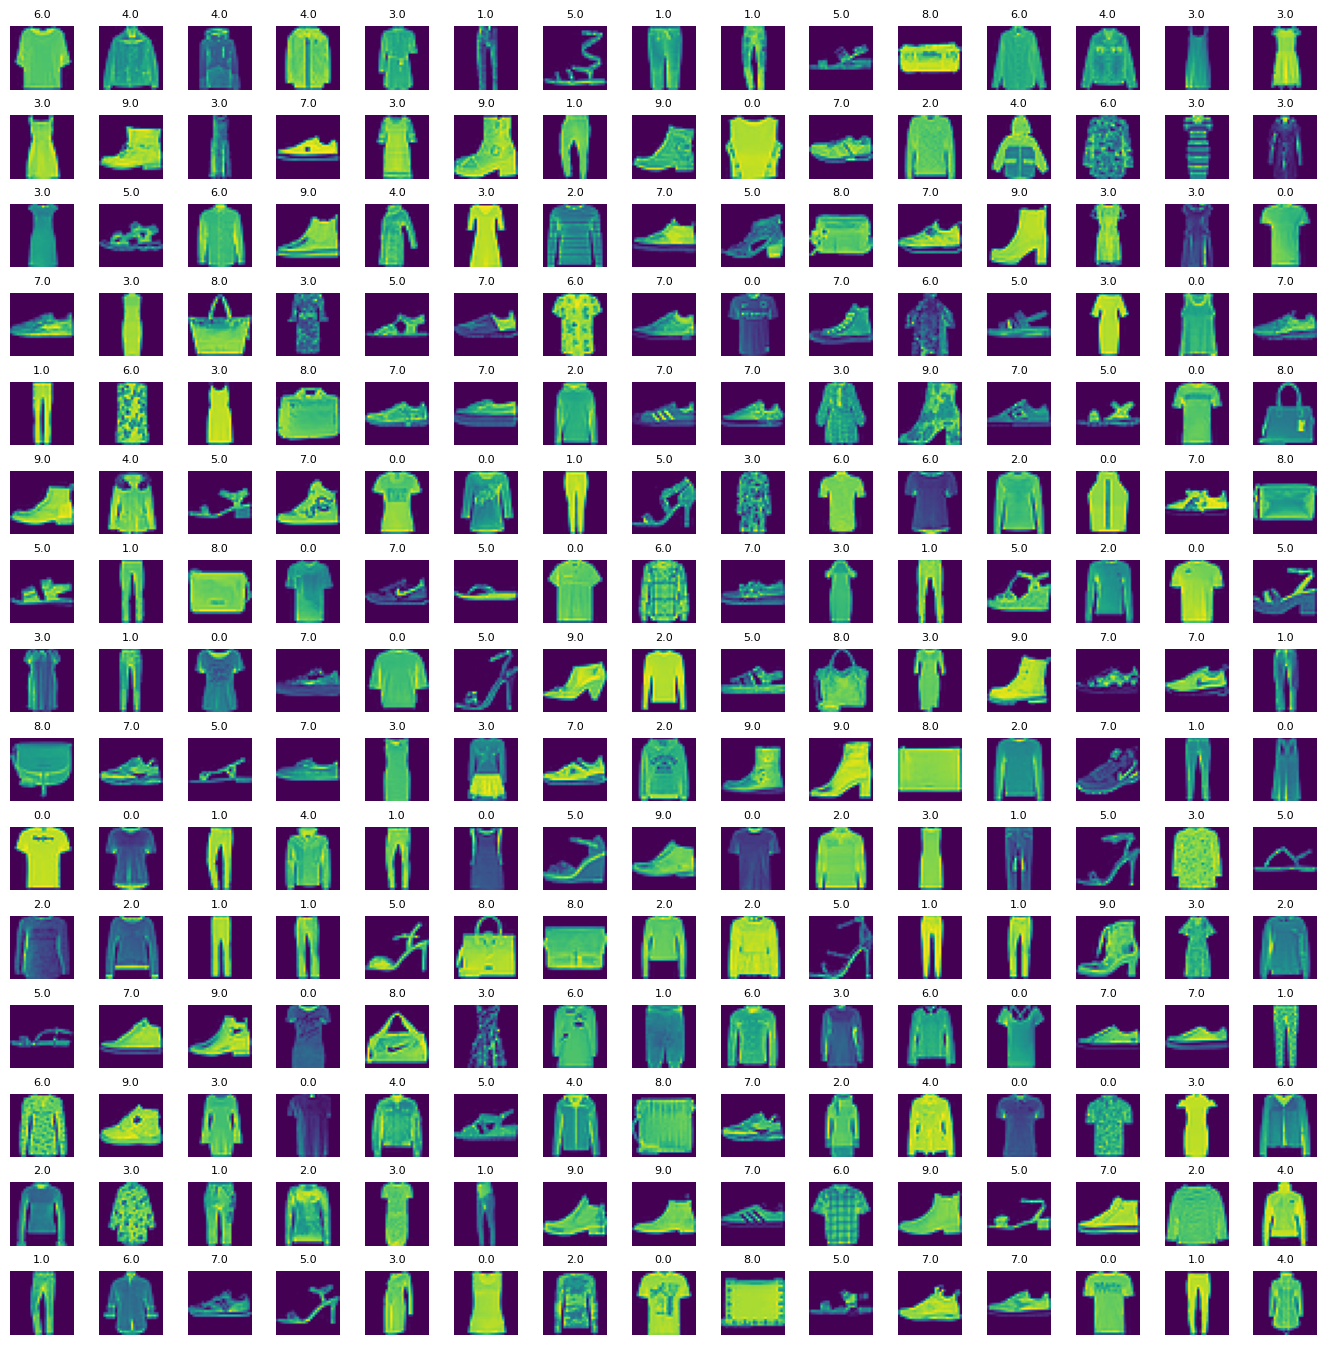

In [14]:
W_grid = 15
L_grid = 15



fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



In [15]:
#train section

In [16]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [17]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [19]:
X_train.shape

(48000, 784)

In [20]:
y_train.shape

(48000,)

In [21]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [22]:
X_train.shape
#X_test.shape

(48000, 28, 28, 1)

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
X_validate.shape

(12000, 28, 28, 1)

In [25]:
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


2024-03-02 15:27:42.917573: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 15:27:43.252943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 15:27:43.253053: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 15:27:43.308137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 15:27:43.431154: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 15:27:43.433535: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [26]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [27]:
cnn_model = Sequential()

In [28]:
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))

In [29]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [30]:
cnn_model.add(Flatten())


In [31]:
#how many neu
cnn_model.add(Dense(activation = 'relu', units=32))

In [32]:
#sigmoid function
cnn_model.add(Dense(activation = 'sigmoid', units=10))

In [33]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [34]:
epochs = 10


In [35]:
cnn_model.fit(X_train,
              y_train,
              batch_size = 512,
              epochs = 10,
              verbose = 1,
              validation_data = (X_validate, y_validate))

Epoch 1/10


2024-03-02 15:27:46.245696: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


91/94 [============================>.] - ETA: 0s - loss: 1.3391 - accuracy: 0.5780

2024-03-02 15:27:48.491936: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


94/94 [==============================] - 2s 19ms/step - loss: 1.3212 - accuracy: 0.5826 - val_loss: 0.7333 - val_accuracy: 0.7359
Epoch 2/10
94/94 [==============================] - 2s 17ms/step - loss: 0.6581 - accuracy: 0.7612 - val_loss: 0.6061 - val_accuracy: 0.7841
Epoch 3/10
94/94 [==============================] - 2s 17ms/step - loss: 0.5768 - accuracy: 0.7915 - val_loss: 0.5599 - val_accuracy: 0.8005
Epoch 4/10
94/94 [==============================] - 2s 17ms/step - loss: 0.5348 - accuracy: 0.8084 - val_loss: 0.5231 - val_accuracy: 0.8138
Epoch 5/10
94/94 [==============================] - 2s 21ms/step - loss: 0.5042 - accuracy: 0.8191 - val_loss: 0.4983 - val_accuracy: 0.8238
Epoch 6/10
94/94 [==============================] - 2s 22ms/step - loss: 0.4854 - accuracy: 0.8247 - val_loss: 0.4850 - val_accuracy: 0.8252
Epoch 7/10
94/94 [==============================] - 2s 21ms/step - loss: 0.4671 - accuracy: 0.8307 - val_loss: 0.4670 - val_accuracy: 0.8326
Epoch 8/10
94/94 [======

In [36]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.8401
Test Accuracy : 0.840


In [37]:
# get the predictions for the test data
# predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

# predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)


313/313 [==============================] - 1s 2ms/step


In [38]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

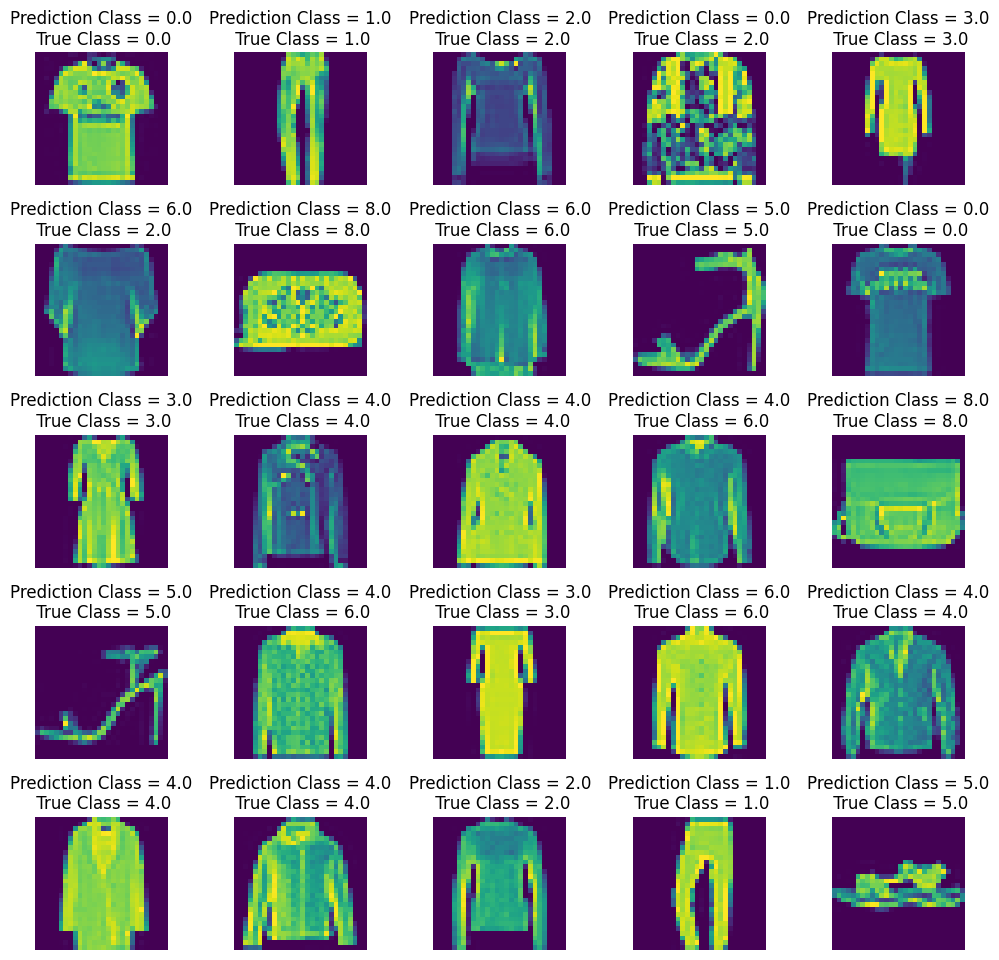

In [39]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


In [49]:
from PIL import Image
import numpy as np

# Load the image
image = Image.open('Images/image4.jpg')

# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Convert to grayscale
image = image.convert('L')

# Flatten the image to a 1D array
image = np.array(image).flatten()

# Normalize pixel values
image = image / 255.0

print(image.shape)  # Output: (784,)


(784,)


In [ ]:
# print(image)

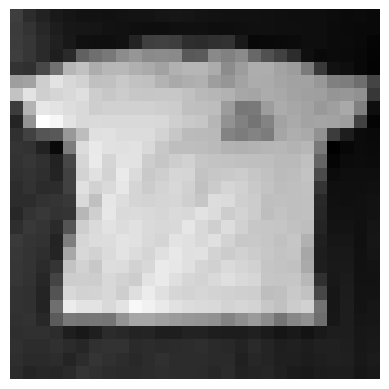

In [50]:
import matplotlib.pyplot as plt

# Reshape the flattened image back to 28x28
image = image.reshape((28, 28))

# Visualize the converted image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [52]:
# Reshape the flattened image data
image = image.reshape((1, 28, 28, 1))
# print(image)
image = training[i,1:].reshape((1,28,28,1))

# Make predictions
predicted_class = np.argmax(cnn_model.predict(image), axis=-1)

print("Predicted class:", predicted_class[0])


1/1 [==============================] - 0s 30ms/step
Predicted class: 0
